In [ ]:
import numpy as np
from tqdm import tqdm, trange
from brian2 import *
import matplotlib.pyplot as plt
from sheet_attractor import simulator
from util import *
from fit import *
from visualization import create_3d_animation
import visualization

FIG_PATH = 'figures/'
os.makedirs(FIG_PATH, exist_ok=True)


INFO       Cache size for target 'cython': 1194 MB.
You can call clear_cache('cython') to delete all files from the cache or manually delete files in the '/home/pajucg/.cython/brian_extensions' directory. [brian2]


In [4]:
parameters = {
  "w_EE": 0.72,
  "w_EI": 0.143, # 0.143
  "w_IE": 0.76, # 0.74
  "w_II": 0.01, # 0.01
  "w_PP": 0.01,
  "w_EP": 0.013, # 0.012
  "w_PE": 0.71, # .709
  "sigma": 0.001,
}

events = [
        {'type': 'visual_cue_on', 'x': 2, 'y': 6, 'strength': 0.5, 'duration': 300*ms},
        {'type': 'visual_cue_off', 'duration': 300*ms},
        {'type': 'shift', 'direction': 'right', 'strength': 0.017, 'duration': 2000*ms},
        # {'type': 'shift', 'direction': 'up', 'strength': 0.018, 'duration': 1100*ms},
        # {'type': 'shift', 'direction': 'left', 'strength': 0.018, 'duration': 1100*ms},
        # {'type': 'shift', 'direction': 'down', 'strength': 0.018, 'duration': 1100*ms},
    ]


13:02:49 : 0 min 1.5 sec -> simulation start
13:05:24 : 2 min 36.8 sec -> simulation end
26000


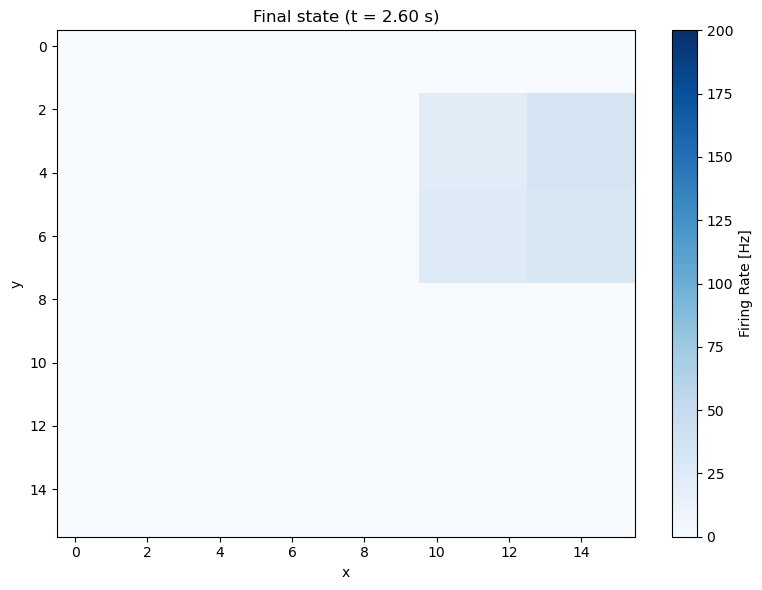

In [5]:
results = simulator(w_EE = parameters['w_EE'], # EB <-> EB
                    w_EI = parameters['w_EI'], # EPG -> R # 0.15
                    w_IE = parameters['w_IE'], # R -> EPG
                    w_II = parameters['w_II'], # R <-> R
                    w_PP = parameters['w_PP'], # PEN <-> PEN
                    w_EP = parameters['w_EP'], # EB -> PEN 
                    w_PE = parameters['w_PE'], # PEN -> EB
                    sigma = parameters['sigma'], # noise level
                    
                    events = events,
                    defaultclock_dt=0.1, # ms
                    seed=830
                    )
t, fr, fr_penx, fr_peny = results
print(len(t))

processed_data = process_data(fr)
# Plot the last frame
plt.figure(figsize=(8, 6))
last_frame = processed_data[:, :, -1]
im_last = plt.imshow(last_frame, cmap='Blues', aspect='auto', interpolation='none',
                     vmin=0, vmax=200)
plt.colorbar(im_last, label='Firing Rate [Hz]')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Final state (t = {(processed_data.shape[2]-1)/10000:.2f} s)')
plt.tight_layout()
plt.show()

In [7]:
# Create and show the 3D animation
processed_data = process_data(fr)
fig = create_3d_animation(processed_data)
fig.show()


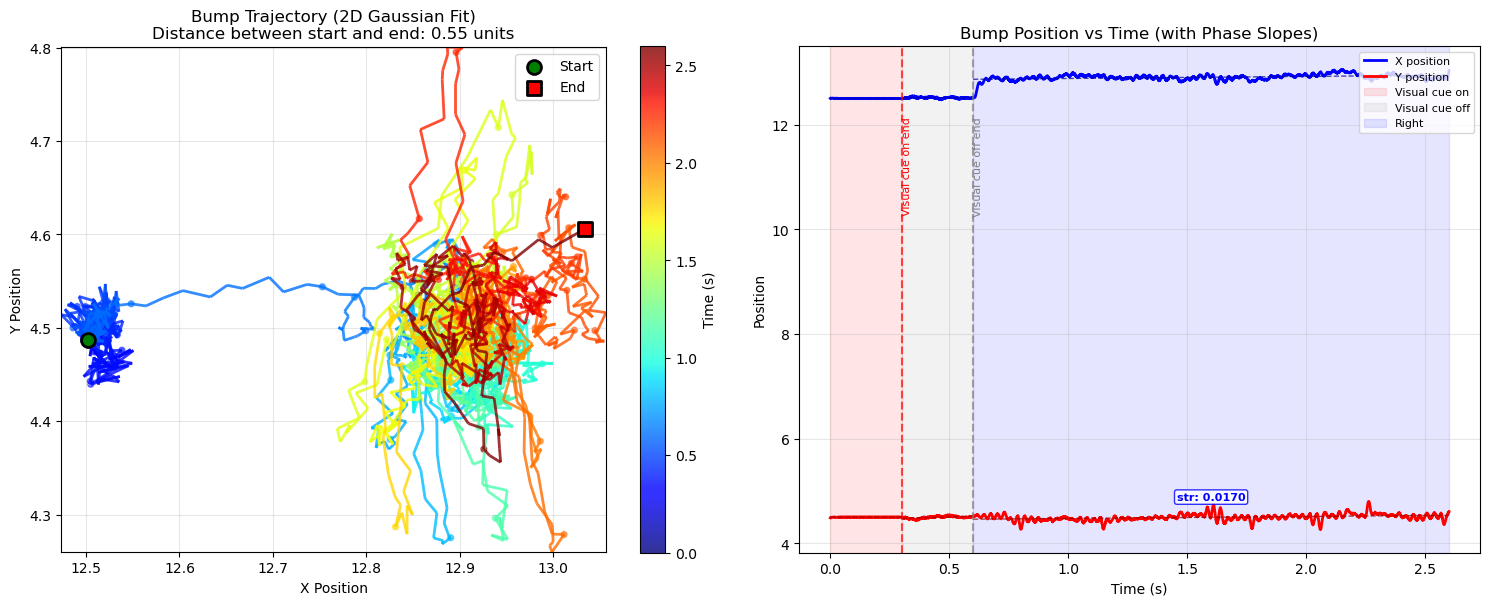

In [ ]:
bump_positions, fit_params = bump_position(processed_data)
trajectory_results = analyze_trajectory(bump_positions, fit_params, processed_data, events)

In [ ]:
print(trajectory_results['phase_results']['Right']['speed']*2*np.pi/16)

0.021081065867674532
